In [1]:
#from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections
#from sklearn.model_selection import train_test_split
#import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#os.chdir("/content/drive/MyDrive/Colab Notebooks/ass1")

In [2]:
train = np.loadtxt('MNIST-Train-cropped.txt')
train = np.reshape(train,(10000,784))

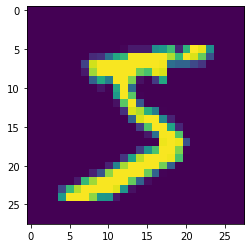

In [ ]:

'''
# test dig 5
train28 = train[0,:]
train28 = np.reshape(train28,(28,28))
plt.imshow(train28.T)
plt.show()
'''

In [3]:
#label for trainset
trainlabel = np.loadtxt('MNIST-Train-Labels-cropped.txt')
trainlabel = np.reshape(trainlabel,(10000,1))
#label+train
labelledtrain = np.hstack((trainlabel,train))
labelledtrain = pd.DataFrame(labelledtrain)

#label for testset
test = np.loadtxt('MNIST-Test-cropped.txt')
test = np.reshape(test,(2000,784))
testlabel = np.loadtxt('MNIST-Test-Labels-cropped.txt')
testlabel = np.reshape(testlabel,(2000,1))
#label+test
labeltest = np.hstack((testlabel,test))
labeltest = pd.DataFrame(labeltest)

In [5]:
# Split train and val Set
trainset = labelledtrain[:round(labelledtrain.shape[0]*0.8)]
valset = labelledtrain.iloc[-round(labelledtrain.shape[0]*0.2):]

In [6]:
def genlabel(dataset,dg1,dg2):
  digital = dataset[dataset[0]==dg1]
  digital = digital.append(dataset[dataset[0]==dg2])
  label = digital[0] #label
  label = np.array(label)
  return label

def gendataset(dataset,dg1,dg2):
  digital = dataset[dataset[0]==dg1]
  digital = digital.append(dataset[dataset[0]==dg2])
  digital_train = digital.drop([0],axis=1)
  digital_train = digital_train.to_numpy()
  return digital_train

In [7]:
# Train set
dg01_train = gendataset(trainset,0,1)
labeldg01_train = genlabel(trainset,0,1)
dg08_train = gendataset(trainset,0,8)
labeldg08_train = genlabel(trainset,0,8)
dg56_train = gendataset(trainset,5,6)
labeldg56_train = genlabel(trainset,5,6)

In [8]:
# Val Set
dg01_val = gendataset(valset,0,1)
labeldg01_val = genlabel(valset,0,1)
dg08_val = gendataset(valset,0,8)
labeldg08_val = genlabel(valset,0,8)
dg56_val = gendataset(valset,5,6)
labeldg56_val = genlabel(valset,5,6)

In [9]:
# test set
dgt01 = gendataset(labeltest,0,1)
labeldgt01 = genlabel(labeltest,0,1)
dgt08 = gendataset(labeltest,0,8)
labeldgt08 = genlabel(labeltest,0,8)
dgt56 = gendataset(labeltest,5,6)
labeldgt56 = genlabel(labeltest,5,6)

In [10]:
##########  make own KNN ##########
def knn(newX, dataset, labels, K):
    #euc_distance = np.dot((newX - dataset).T , (newX - dataset))
    sqdiff = (newX - dataset)**2
    d = sqdiff.sum(axis=1)
    euc_d = d**0.5
    #print('dist:',d) 
    sort = d.argsort()
    #print('dist_index:',sort) 
    nearlabels = [labels[i] for i in sort[0 : K]]  # nearest label
    label = collections.Counter(nearlabels).most_common(1)[0][0] # majority vote of K, select the first one
    return label

In [11]:
##########  errcount ##########
def err(inX, data, labels1, labels2):
  errcount = []
  for k in range(1,34,2):
    error = 0
    for x in range(inX.shape[0]):
      answer = knn(inX[x], data, labels1, k)
      if answer != labels2[x]:
        error += 1
    errcount.append(error)
    #print("k=%d, err=%d, error rate is:%.4f%%" % (k, error, 100 * error/float(inX.shape[0])))
  return errcount

In [12]:
##########  errpercentage ##########
def errper(error, tset):
  error2 = pd.DataFrame(data = error, columns = ["Error rate %"])
  errpercent = error2 / float(tset.shape[0]) *100
  #errpercent['Error rate %'] = errpercent['Error rate %'].map(lambda x: format(x,'.2%'))
  return errpercent

In [13]:
print('very slow, please take a shower')

very slow, please take a shower


In [14]:
##########  very slow ##########
val01 = err(dg01_val, dg01_train, labeldg01_train, labeldg01_val)
val08 = err(dg08_val, dg08_train, labeldg08_train, labeldg08_val)
val56 = err(dg56_val, dg56_train, labeldg56_train, labeldg56_val)
test01 = err(dgt01, dg01_train, labeldg01_train, labeldgt01)
test08 = err(dgt08, dg08_train, labeldg08_train, labeldgt08)
test56 = err(dgt56, dg56_train, labeldg56_train, labeldgt56)

In [17]:
v01pcent = errper(val01, dg01_val)
v08pcent = errper(val08, dg08_val)
v56pcent = errper(val56, dg56_val)
t01pcent = errper(test01, dgt01)
t08pcent = errper(test08, dgt08)
t56pcent = errper(test56, dgt56)

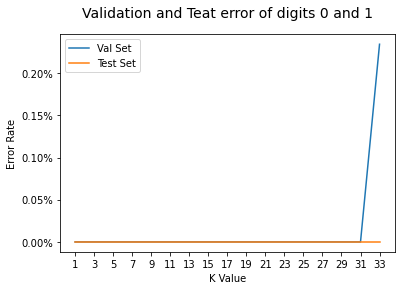

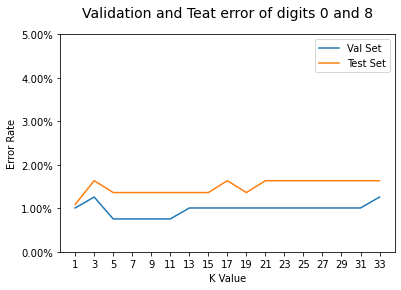

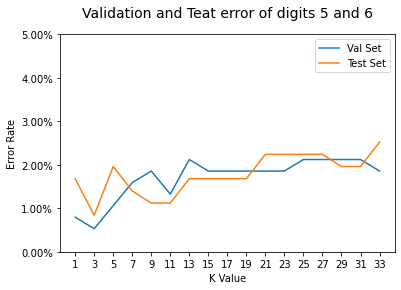

In [18]:
x = pd.DataFrame([k for k in range(1,34,2)])

plotdata01 = pd.concat([v01pcent,t01pcent,x], axis=1)
plotdata01.columns = ['valset of dig 0,1', 'testset of dig 0,1','K Value']
ax=sns.lineplot(x = 'K Value', y ='valset of dig 0,1', data= plotdata01, label = 'Val Set')
ax=sns.lineplot(x = 'K Value', y ='testset of dig 0,1',data= plotdata01, label = 'Test Set')
plt.legend(loc='best')
#ax.set_xlabel('xxxxxxxxx')
ax.set_ylabel('Error Rate')
ax.set_xticks(x[0])
ax.set_yticklabels(['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]) # num to percentage
ax.set_title('Validation and Teat error of digits 0 and 1', fontsize=14, position=(0.5,1.05))
plt.savefig('Assignment1_Question4_Plot1.pdf')
plt.show()

plotdata08 = pd.concat([v08pcent,t08pcent,x], axis=1)
plotdata08.columns = ['valset of dig 0,8', 'testset of dig 0,8','K Value']
ax=sns.lineplot(x = 'K Value', y ='valset of dig 0,8', data= plotdata08, label = 'Val Set')
ax=sns.lineplot(x = 'K Value', y ='testset of dig 0,8',data= plotdata08, label = 'Test Set')
plt.legend(loc='best')
#ax.set_xlabel('xxxxxxxxx')
ax.set_ylabel('Error Rate')
ax.set_xticks(x[0])
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]) # num to percentage
ax.set_title('Validation and Teat error of digits 0 and 8', fontsize=14, position=(0.5,1.05))
plt.savefig('Assignment1_Question4_Plot2.pdf')
plt.show()

plotdata56 = pd.concat([v56pcent,t56pcent,x], axis=1)
plotdata56.columns = ['valset of dig 5,6', 'testset of dig 5,6','K Value']
ax=sns.lineplot(x = 'K Value', y ='valset of dig 5,6', data= plotdata56, label = 'Val Set')
ax=sns.lineplot(x = 'K Value', y ='testset of dig 5,6',data= plotdata56, label = 'Test Set')
plt.legend(loc='best')
#ax.set_xlabel('xxxxxxxxx')
ax.set_ylabel('Error Rate')
ax.set_xticks(x[0])
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]) # num to percentage
ax.set_title('Validation and Teat error of digits 5 and 6', fontsize=14, position=(0.5,1.05))
plt.savefig('Assignment1_Question4_Plot3.pdf')
plt.show()


In [ ]:
###something unimportant
'''use sklearn.neighbors

storek = []
err = []
for k in range(1,34,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train, labeltrain)
    score = model.score(val, labelval)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    storek.append(k)
    err.append((100-(score * 100)))
	
valerr=np.vstack((storek,err))
valerr=pd.DataFrame(data=valerr.T, columns=['K','Err %'])
ax=sns.lineplot(x='K', y='Err %', data= valerr)
plt.xticks(valerr['K'])
ax.set_title('Validation err as a function of K (dgXX)', fontsize=14, position=(0.5,1.05))

use sklearn.neighbors'''

'''
#dig0,1
dg01 = np.vstack((labelledtrain[labelledtrain[:,0]==0,:],labelledtrain[labelledtrain[:,0]==1,:]))
labeldg01=dg01[:,0] #label
dg01_train, dg01_val, labeldg01_train, labeldg01_val = train_test_split(dg01, labeldg01, test_size=0.2)
dg01_train = np.delete(dg01_train, 0, axis=1)
dg01_val = np.delete(dg01_val, 0, axis=1)
'''